In [1]:
%matplotlib inline
from LogisticRegression_model import load_data, train_with_kfold, evaluate_model
import matplotlib.pyplot as plt

# 1. Chỉ số tổng quan của mô hình

Accuracy: 91.37%
Precision: 53.59%
Recall: 10.01%
F1: 16.88%


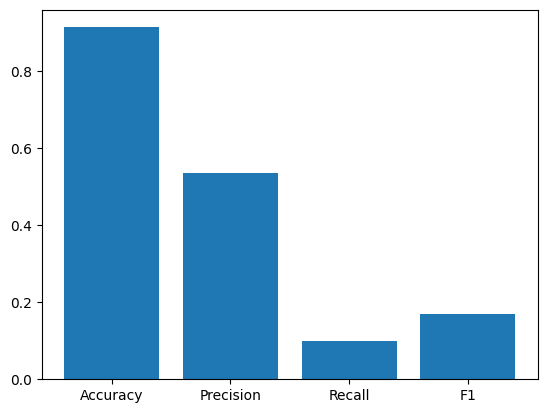

In [3]:
accuracy, precision, recall, f1 = evaluate_model()

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))

# plot the ROC curve
plt.bar(["Accuracy", "Precision", "Recall", "F1"], [accuracy, precision, recall, f1])
plt.show()


### Đánh giá các chỉ số của mô hình Logistic Regression

Dựa trên biểu đồ và các chỉ số từ mô hình Logistic Regression, chúng ta có thể đánh giá như sau:

#### 1. **Accuracy (Độ chính xác: 91.37%)**:
   - Đây là một chỉ số rất cao, cho biết rằng 91.37% các dự đoán của mô hình là chính xác. Tuy nhiên, điều này không nhất thiết đồng nghĩa với việc mô hình hoạt động tốt, đặc biệt trong trường hợp dữ liệu không cân bằng.

#### 2. **Precision (Độ chính xác của Positive: 53.59%)**:
   - Precision cho biết trong số các mẫu mà mô hình dự đoán là "có bệnh" (positive), có 53.59% là đúng. Precision tương đối thấp cho thấy có nhiều trường hợp dương tính giả (false positives), tức là mô hình dự đoán bệnh nhưng thực tế không có bệnh.

#### 3. **Recall (Độ nhạy: 10.01%)**:
   - Đây là chỉ số rất thấp. Recall cho biết trong số các trường hợp thực sự mắc bệnh, chỉ có 10.01% được mô hình dự đoán đúng. Điều này chỉ ra rằng mô hình bỏ lỡ rất nhiều bệnh nhân thực sự mắc bệnh (false negatives). Đối với các bài toán y tế hoặc sức khỏe, Recall thấp có thể rất nguy hiểm vì nó dẫn đến việc bỏ sót nhiều trường hợp cần điều trị.

#### 4. **F1 Score (16.88%)**:
   - F1 là thước đo tổng hợp giữa Precision và Recall, và giá trị F1 khá thấp (16.88%) phản ánh rằng mô hình đang gặp khó khăn trong việc cân bằng giữa Precision và Recall. Đặc biệt khi Recall rất thấp, F1 sẽ bị ảnh hưởng đáng kể.

### Tổng quan đánh giá mô hình:
- **Mô hình này có độ chính xác tổng thể cao (Accuracy) nhưng lại gặp vấn đề lớn về việc phân loại chính xác các mẫu thuộc lớp "có bệnh" (positive class)**. Điều này thể hiện rõ qua **Recall rất thấp** và **Precision chỉ ở mức trung bình**.
- Đây có thể là kết quả của dữ liệu không cân bằng, nơi mà số lượng mẫu của lớp "không bệnh" (negative class) chiếm ưu thế so với lớp "có bệnh" (positive class). Khi đó, mô hình Logistic Regression dễ nghiêng về việc dự đoán nhiều hơn vào lớp không bệnh, khiến chỉ số Accuracy cao nhưng Precision và Recall bị ảnh hưởng.

# 2. Đánh giá mô hình

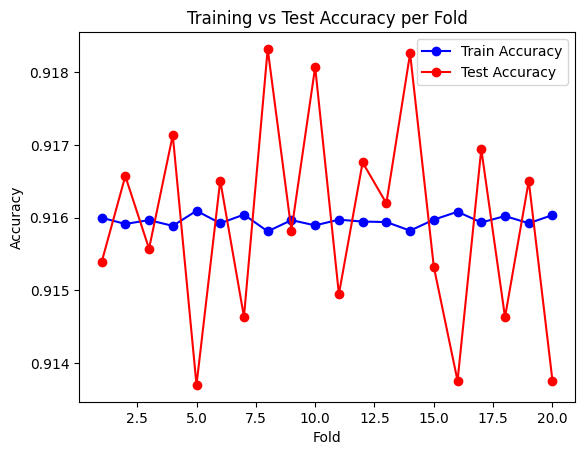

In [10]:
df = load_data()
train_scores, test_scores = train_with_kfold(df,20)


# Hàm vẽ biểu đồ thể hiện overfitting/underfitting
def plot_overfitting(train_scores, test_scores):
    fig, ax = plt.subplots()
    fold_range = range(1, len(train_scores) + 1)

    # Vẽ điểm accuracy trên tập huấn luyện và kiểm tra cho từng fold
    ax.plot(fold_range, train_scores, label="Train Accuracy", marker="o", color="blue")
    ax.plot(fold_range, test_scores, label="Test Accuracy", marker="o", color="red")

    # Đặt nhãn và tiêu đề
    ax.set_xlabel("Fold")
    ax.set_ylabel("Accuracy")
    ax.set_title("Training vs Test Accuracy per Fold")
    ax.legend()

    # Hiển thị biểu đồ
    plt.show()


# Gọi hàm để vẽ biểu đồ
plot_overfitting(train_scores, test_scores)

## Đánh giá mô hình:
- **Hiện tượng Overfitting:** Mặc dù không có sự khác biệt quá lớn giữa độ chính xác trên tập huấn luyện và kiểm tra, nhưng sự dao động lớn trên tập kiểm tra có thể ám chỉ mô hình đang có dấu hiệu overfitting nhẹ. Mô hình có thể hoạt động rất tốt trên tập huấn luyện nhưng không tổng quát hóa được tốt trên tập kiểm tra. Khi đó, mô hình cố gắng "học thuộc" dữ liệu huấn luyện, dẫn đến không thể xử lý các biến động trên dữ liệu mới.

#### Cần cải thiện tính ổn định: Sự dao động mạnh của đường Test Accuracy cho thấy cần có các biện pháp cải thiện như:

- Tăng số lượng dữ liệu: Đảm bảo dữ liệu phong phú hơn để mô hình có khả năng học tốt hơn và tổng quát hóa cao hơn.
- Regularization: Bạn có thể thử các biện pháp giảm overfitting như thêm regularization (L1, L2).
- Điều chỉnh hyperparameter: Thử điều chỉnh các tham số của mô hình để tìm kiếm sự cân bằng tốt hơn giữa huấn luyện và kiểm tra.